# Principles of Machine Learning: R Edition - Final Exam

This project is based on Principles of Machine Learning: R Edition course provided by Microsoft through the edx.com service. The purpose of my work is to answer the questions of the final exam of the course with the precise explanation of my methods implemented in this project which I have learned following the content of the course and also using other resources. 

## Data Exploration

First things first, it's important to upload and install missing packages which are crucial for the project.

In [1]:
library(dplyr)
library(lattice)
library(ggplot2)
library(caret)
library(repr)
library(randomForest)
library(formattable)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



### Average Month Spend

In Exercise 1, 2, 3 and 4 we need to find out where we can check minimum, maximum, median and mean  amount of money the customer spends with Adventure Works Cycles on average each month.

Firstly, We need to import csv file (AW_AveMonthSpend.csv) before exploring the mertrics of the data. 

In [2]:
avs <- read.csv('/Users/szymonduranowski/Downloads/FinalExam/AW_AveMonthSpend.csv')

In [3]:
summary(avs)

   CustomerID    AveMonthSpend   
 Min.   :11000   Min.   : 22.00  
 1st Qu.:15604   1st Qu.: 52.00  
 Median :20221   Median : 68.00  
 Mean   :20234   Mean   : 72.41  
 3rd Qu.:24860   3rd Qu.: 84.00  
 Max.   :29482   Max.   :176.00  

Summary() function shows a set of descriptive statistics every variable from each columns. The minimum amount of money the customer spends is 22. The maximum is 176, mean is 72.41 and median equals 68.

For Exercise 5 we need to calculate standard deviation by ourselves. To calculate it we use sd() function.

In [4]:
sd(avs$AveMonthSpend)

[1] 27.28537

### Bike Buyer 

Now, it's time indicate and compare the number of the customers who bought and not bought any bike. Let's find out how many columns dataset includes and which one is the right one.

In [5]:
bb <- read.csv('/Users/szymonduranowski/Downloads/FinalExam/AW_BikeBuyer.csv')
str(bb)

'data.frame':	16519 obs. of  2 variables:
 $ CustomerID: int  11000 11001 11002 11003 11004 11005 11006 11007 11008 11009 ...
 $ BikeBuyer : int  0 1 0 0 1 1 1 1 1 0 ...


We already know it is the column with BikeBuyer label.

In [6]:
table(bb$BikeBuyer)


    0     1 
11030  5489 

By using table() function on BikeBuyer column it is possible to see amount of people who bought bikes = 1 and who did not = 0. There are two times more people who bought bike than those who did not and this is the answer for the Excercise 6.

### Customer demographic data

In Excercise 7 we need to select the correct order (from the lowest to the highest) that ranks the median YearlyIncome by Occupation.

In [7]:
awc <- read.csv('/Users/szymonduranowski/Downloads/FinalExam/AdvWorksCusts.csv')
dim(awc)

[1] 16519    23

The customer sales data includes 23 columns and 16519 variables, therefore we have a dataset with an extented amount of feateures in comparison to the previous tables. Amongst 23 columns there are YearlyIncome and Occupation. We calculate the median of the variables and then create a barplot to visualize the results.

Occupation,Median
Clerical,49387.0
Manual,21722.5
Management,118780.0
Skilled_Manual,66481.0
Professional,99046.0


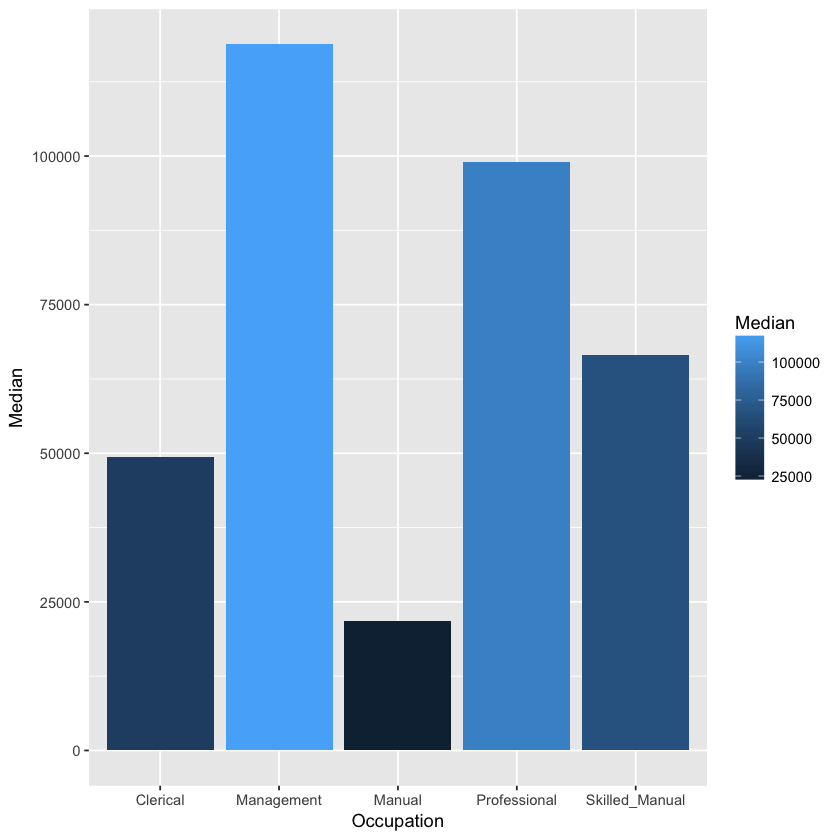

In [8]:
clerical_awc <- subset(awc, Occupation == 'Clerical')
manual_awc <- subset(awc, Occupation == 'Manual')
management_awc <- subset(awc, Occupation == 'Management')
skilledm_awc <- subset(awc, Occupation == 'Skilled Manual')
professional_awc <- subset(awc, Occupation == 'Professional')

Occupation <- c("Clerical", "Manual", "Management", "Skilled_Manual", "Professional")
Median <- c(median(clerical_awc$YearlyIncome), median(manual_awc$YearlyIncome), median(management_awc$YearlyIncome),
            median(skilledm_awc$YearlyIncome), median(professional_awc$YearlyIncome))

median_occupation <- data.frame(Occupation, Median)
median_occupation

ggplot(median_occupation, aes(x = Occupation, y = Median, fill=Median))+geom_bar(stat = "identity")               

The barplot shows us median of yearly income by occupation. It seems that people earn more as management, professional and skilled manual workers. The lowest paid are clerical and manual workers. 

A group of customers based on age and gender with the highest AveMonthSpend values is the answer for the Excercise 8. As a first step we need to concatenate two datesets(AdvWorksCusts and AveMonthSpend) into one dataset.

In [9]:
awc_avs<-merge(awc,avs,by.x=c("CustomerID"), by.y=c("CustomerID"),all=TRUE)
head(awc_avs)

CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,⋯,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend
11000,,Jon,V,Yang,,3761 N. 14th St,,Rockhampton,Queensland,⋯,Bachelors,Professional,M,M,1,0,0,2,137947,89
11001,,Eugene,L,Huang,,2243 W St.,,Seaford,Victoria,⋯,Bachelors,Professional,M,S,0,1,3,3,101141,117
11002,,Ruben,,Torres,,5844 Linden Land,,Hobart,Tasmania,⋯,Bachelors,Professional,M,M,1,1,3,3,91945,123
11003,,Christy,,Zhu,,1825 Village Pl.,,North Ryde,New South Wales,⋯,Bachelors,Professional,F,S,0,1,0,0,86688,50
11004,,Elizabeth,,Johnson,,7553 Harness Circle,,Wollongong,New South Wales,⋯,Bachelors,Professional,F,S,1,4,5,5,92771,95
11005,,Julio,,Ruiz,,7305 Humphrey Drive,,East Brisbane,Queensland,⋯,Bachelors,Professional,M,S,1,1,0,0,103199,78


As another step we use similar method just like in previous exercise.

Customers,AveMonthSpend
Males <25,110667
Females <25,71523
Males >55,38448
Females >55,25662
Males 25<45,481445
Females 25<45,300559


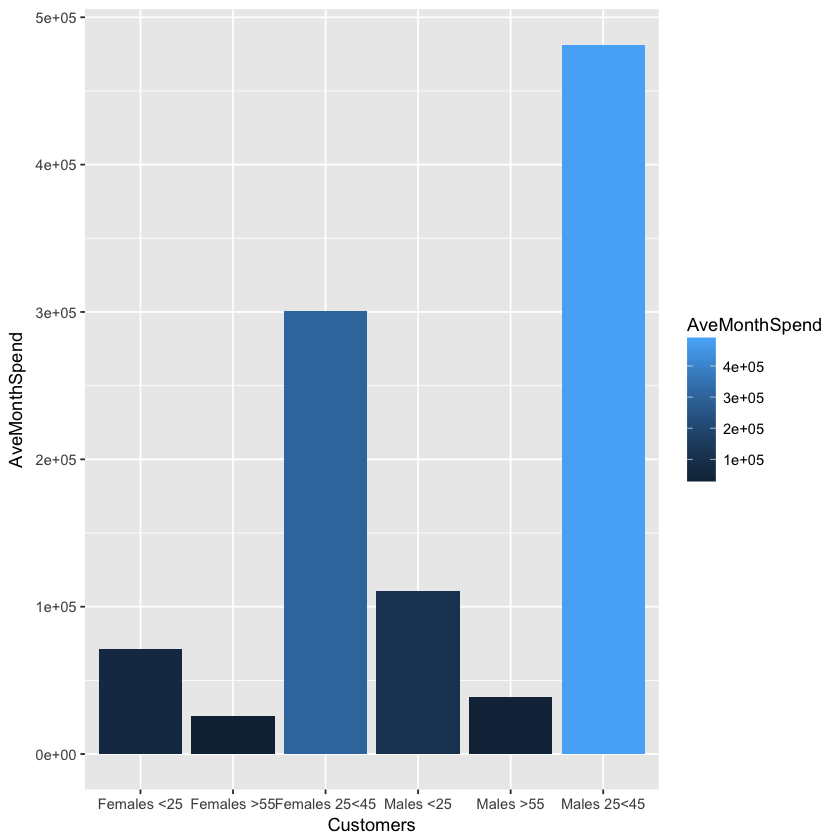

In [10]:
awc_avs$BirthDate <- as.Date(awc_avs$BirthDate, "%Y-%m-%d")
under25 <- subset(awc_avs, BirthDate >= as.Date('1973-01-01') )
over55 <- subset(awc_avs, BirthDate <= as.Date('1943-01-01') )
between25and45 <- subset(awc_avs, BirthDate <= as.Date('1973-01-01') & BirthDate >= as.Date('1953-01-01'))

m_under25 <- subset(under25, Gender == 'M' )
f_under25 <- subset(under25, Gender == 'F' )
m_over55 <- subset(over55, Gender == 'M' )
f_over55 <- subset(over55, Gender == 'F' )
m_between25and45 <- subset(between25and45, Gender == 'M' )
f_between25and45 <- subset(between25and45, Gender == 'F' )

Customers <- c('Males <25', 'Females <25', 'Males >55',
               'Females >55', 'Males 25<45', 'Females 25<45')

AveMonthSpend <- c(sum(m_under25$AveMonthSpend), sum(f_under25$AveMonthSpend), sum(m_over55$AveMonthSpend),
                sum(f_over55$AveMonthSpend), sum(m_between25and45$AveMonthSpend), sum(f_between25and45$AveMonthSpend))

Customers_AveMonthSpend <- data.frame(Customers, AveMonthSpend)
Customers_AveMonthSpend

ggplot(Customers_AveMonthSpend, aes(x = Customers, y = AveMonthSpend, fill=AveMonthSpend))+geom_bar(stat = "identity")

It is clearly shown that males between 25 and 45 are the group which accounts for the highest AveMonthSpend.

In Exercise 9 we need to check if the followings below are true or false:
    a) Married customers have a higher median AvgMonthSpend than single customers,
    b) Customers with no car have a higher median AvgMonthSpend than customers with three or more cars,
    c) Male customers have a higher median AvgMonthSpend than female customers,
    d) Female customers have a wider range of AvgMonthSpend values than male customers,
    e) Customers with no children at home have a lower median AvgMonthSpend values than customers with one or more children at home.

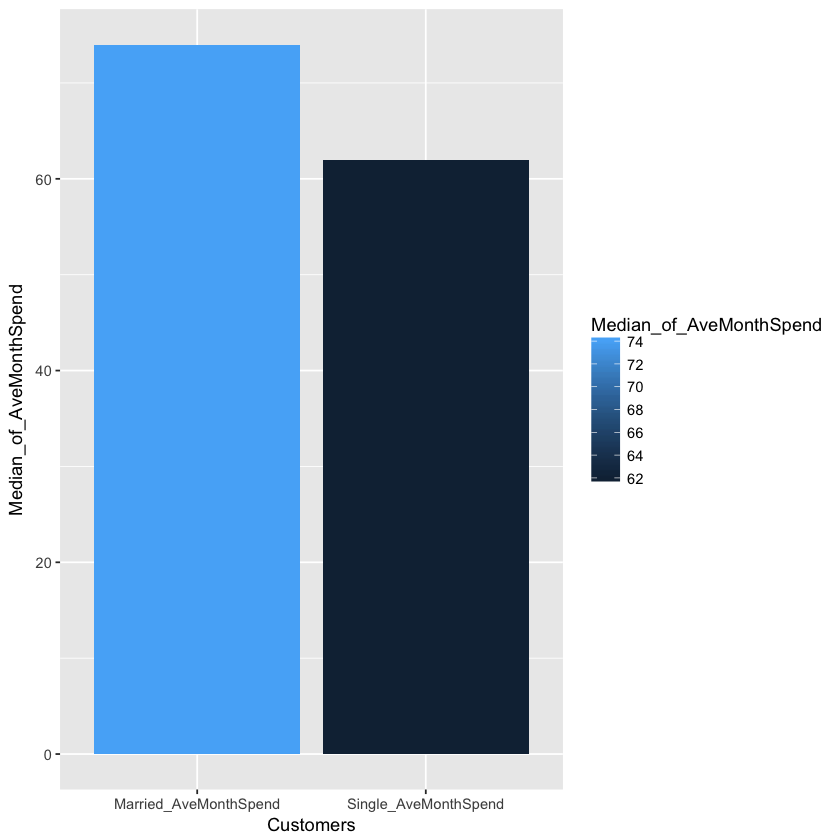

In [11]:
married_customers <- subset(awc_avs, MaritalStatus == 'M' )
single_customers <- subset(awc_avs, MaritalStatus == 'S' )

Customers <- c('Married_AveMonthSpend', 'Single_AveMonthSpend')
Median_of_AveMonthSpend <- c(median(married_customers$AveMonthSpend), median(single_customers$AveMonthSpend))

ggplot(data.frame(Customers, Median_of_AveMonthSpend), 
       aes(x = Customers, y = Median_of_AveMonthSpend, 
        fill=Median_of_AveMonthSpend))+geom_bar(stat = "identity")

a) Married customers have a higher median AvgMonthSpend than single customers - that is definately true.

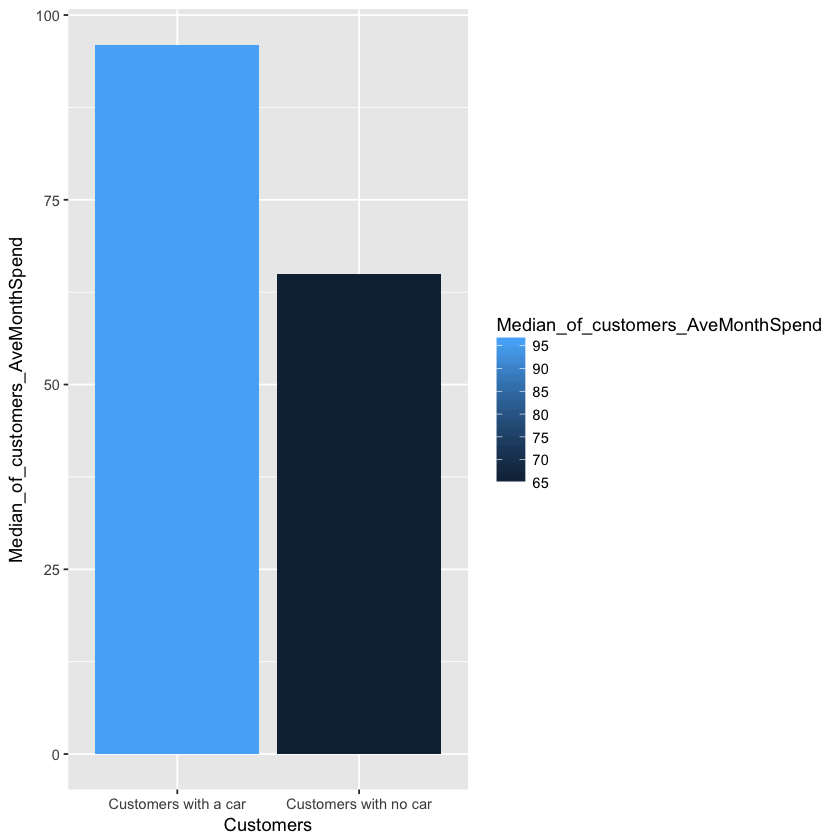

In [12]:
customers_with_no_car <- subset(awc_avs, awc_avs$NumberCarsOwned == 0)
customers_with_a_car <- subset(awc_avs, awc_avs$NumberCarsOwned >= 3)

Customers <- c('Customers with a car', 'Customers with no car')
Median_of_customers_AveMonthSpend <- c(median(customers_with_a_car$AveMonthSpend), 
                                       median(customers_with_no_car$AveMonthSpend))

ggplot(data.frame(Customers, Median_of_customers_AveMonthSpend), 
       aes(x = Customers, y = Median_of_customers_AveMonthSpend, 
           fill = Median_of_customers_AveMonthSpend))+geom_bar(stat = "identity")

b) Customers with no car have a higher median AvgMonthSpend than customers with three or more cars - false.

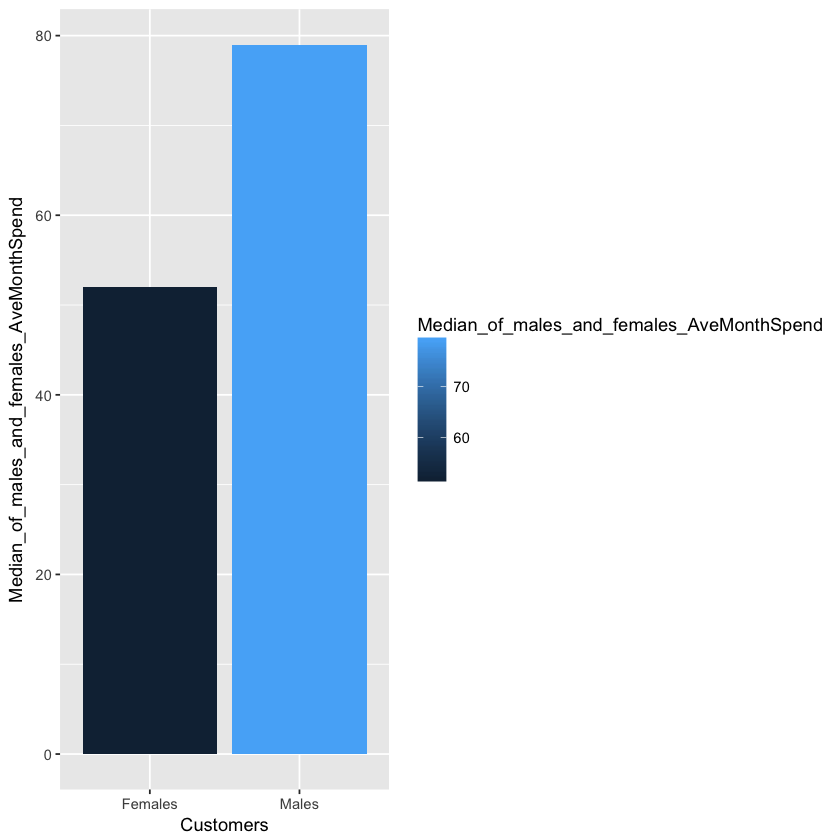

In [13]:
male_customers <- subset(awc_avs, Gender == 'M' )
female_customers <- subset(awc_avs, Gender == 'F' )

Customers <- c('Males', 'Females')
Median_of_males_and_females_AveMonthSpend <- c(median(male_customers$AveMonthSpend), 
                                               median(female_customers$AveMonthSpend))

ggplot(data.frame(Customers, Median_of_males_and_females_AveMonthSpend),
       aes(x = Customers, y = Median_of_males_and_females_AveMonthSpend,
           fill = Median_of_males_and_females_AveMonthSpend))+geom_bar(stat = "identity")

c) Male customers have a higher median AvgMonthSpend than female customers - yes, that is true.

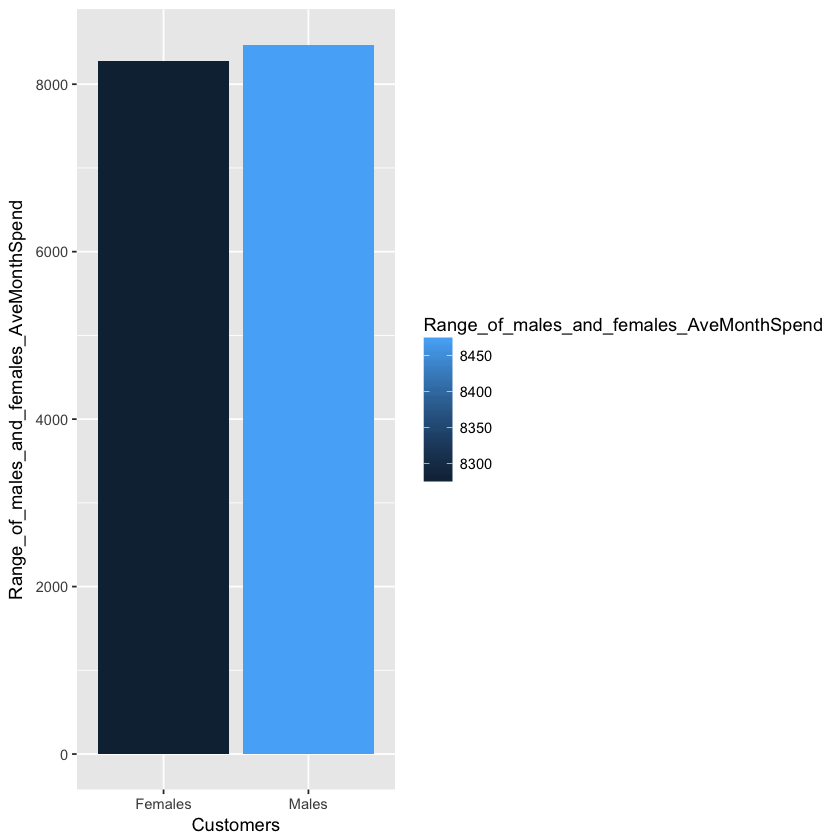

In [14]:
male_customers <- subset(awc_avs, Gender == 'M' )
female_customers <- subset(awc_avs, Gender == 'F' )

Customers <- c('Males', 'Females')
Range_of_males_and_females_AveMonthSpend <- c(as.numeric(count(male_customers)), as.numeric(count(female_customers)))

ggplot(data.frame(Customers, Range_of_males_and_females_AveMonthSpend),
       aes(x = Customers, y = Range_of_males_and_females_AveMonthSpend,
           fill = Range_of_males_and_females_AveMonthSpend))+geom_bar(stat = "identity")

d) Female customers have a wider range of AvgMonthSpend values than male customers - false, Males columns has slightly wider range.

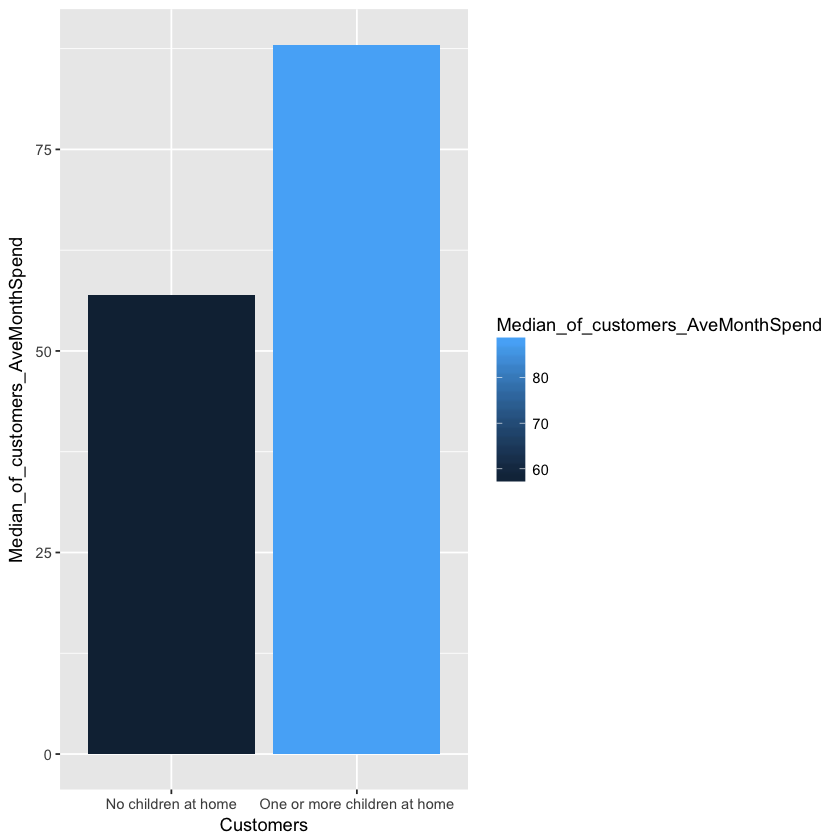

In [15]:
customers_with_no_children_at_home<- subset(awc_avs, NumberChildrenAtHome == 0)
customers_with_any_children_at_home<- subset(awc_avs, NumberChildrenAtHome > 0)

Customers <- c('No children at home', 'One or more children at home')
Median_of_customers_AveMonthSpend <- c(median(customers_with_no_children_at_home$AveMonthSpend), 
                                               median(customers_with_any_children_at_home$AveMonthSpend))

ggplot(data.frame(Customers, Median_of_customers_AveMonthSpend),
       aes(x = Customers, y = Median_of_customers_AveMonthSpend,
           fill = Median_of_customers_AveMonthSpend))+geom_bar(stat = "identity")

e) Customers with no children at home have a lower median AvgMonthSpend values than customers with one or more children at home - yes, that's correct answer.

Exercise 10 is the last one of Data Exploration section.
    a) The median YearlyIncome is higher for customers who bought a bike than for customers who didn't,
    b) The median number of cars owned by customers who bought a bike is lower than for customers who didn't,
    c) The most common occupation type for customers who bought a bike is skilled manual,
    d) Male customers are more likely to buy bikes than female customers,
    e) A maried customer is more likely to buy a bike,
This time we concatenate datasets altogether. 

In [16]:
awc_avs_bb<-merge(awc_avs,bb,by.x=c("CustomerID"), by.y=c("CustomerID"),all=TRUE)
head(awc_avs_bb)

CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,⋯,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
11000,,Jon,V,Yang,,3761 N. 14th St,,Rockhampton,Queensland,⋯,Professional,M,M,1,0,0,2,137947,89,0
11001,,Eugene,L,Huang,,2243 W St.,,Seaford,Victoria,⋯,Professional,M,S,0,1,3,3,101141,117,1
11002,,Ruben,,Torres,,5844 Linden Land,,Hobart,Tasmania,⋯,Professional,M,M,1,1,3,3,91945,123,0
11003,,Christy,,Zhu,,1825 Village Pl.,,North Ryde,New South Wales,⋯,Professional,F,S,0,1,0,0,86688,50,0
11004,,Elizabeth,,Johnson,,7553 Harness Circle,,Wollongong,New South Wales,⋯,Professional,F,S,1,4,5,5,92771,95,1
11005,,Julio,,Ruiz,,7305 Humphrey Drive,,East Brisbane,Queensland,⋯,Professional,M,S,1,1,0,0,103199,78,1


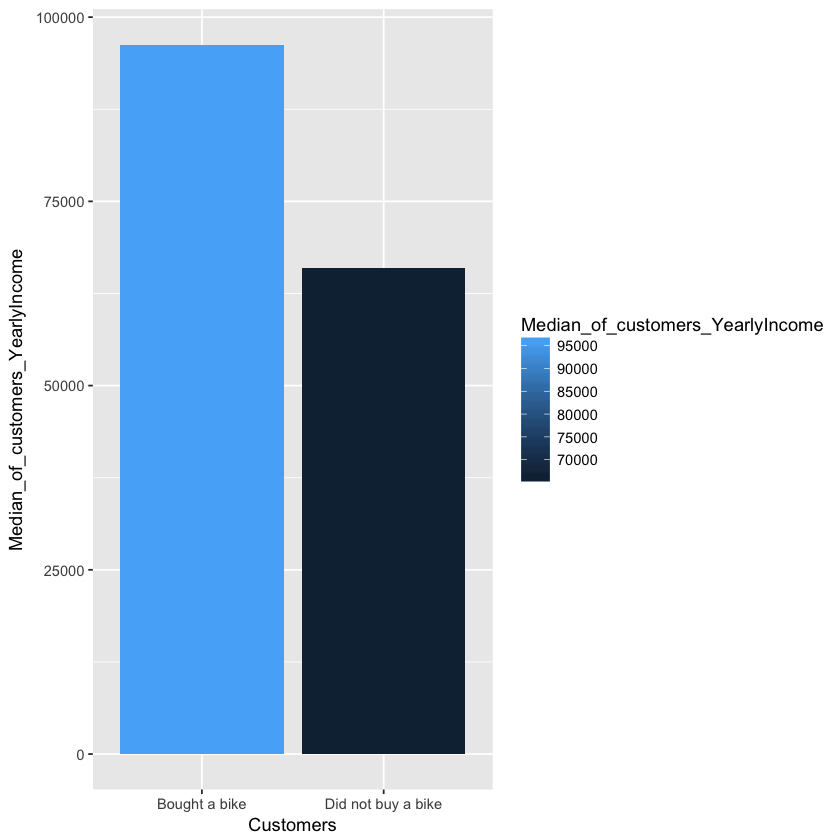

In [17]:
bikebuyer_yes <- subset(awc_avs_bb, BikeBuyer > 0)
bikebuyer_no <- subset(awc_avs_bb, BikeBuyer == 0)

Customers <- c('Bought a bike', 'Did not buy a bike')
Median_of_customers_YearlyIncome <- c(median(bikebuyer_yes$YearlyIncome), 
                                        median(bikebuyer_no$YearlyIncome))

ggplot(data.frame(Customers, Median_of_customers_YearlyIncome),
       aes(x = Customers, y = Median_of_customers_YearlyIncome,
           fill = Median_of_customers_YearlyIncome))+geom_bar(stat = "identity")

a) The median YearlyIncome is higher for customers who bought a bike than for customers who didn't - correct answer.

In [18]:
carowners_bikebuyers_yes <- subset(bikebuyer_yes, NumberCarsOwned >= 0)
carowners_bikebuyers_no <- subset(bikebuyer_no, NumberCarsOwned >= 0)
median_carowners_bikebuyers <- c(carowners_bikebuyers_yes=median(bikebuyer_yes$NumberCarsOwned), 
                                 carowners_bikebuyers_no=median(bikebuyer_no$NumberCarsOwned))

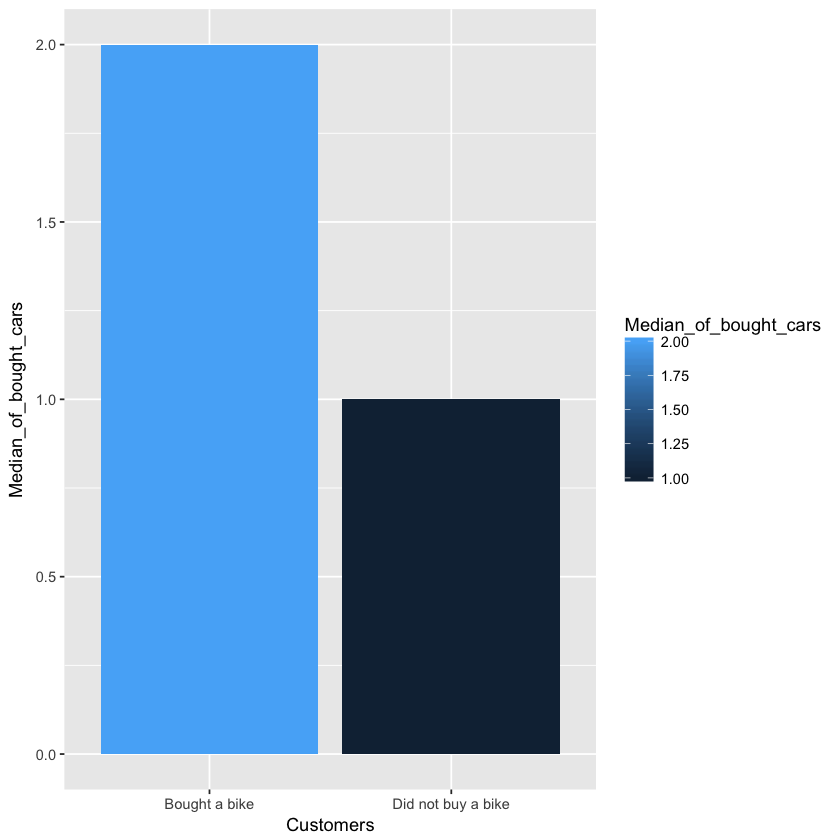

In [19]:
carowners_bikebuyers_yes <- subset(bikebuyer_yes, NumberCarsOwned >= 0)
carowners_bikebuyers_no <- subset(bikebuyer_no, NumberCarsOwned >= 0)

Customers <- c('Bought a bike', 'Did not buy a bike')
Median_of_bought_cars <- c(median(bikebuyer_yes$NumberCarsOwned), 
                            median(bikebuyer_no$NumberCarsOwned))

ggplot(data.frame(Customers, Median_of_bought_cars),
       aes(x = Customers, y = Median_of_bought_cars,
           fill = Median_of_bought_cars))+geom_bar(stat = "identity")

b) The median number of cars owned by customers who bought a bike is lower than for customers who didn't - false

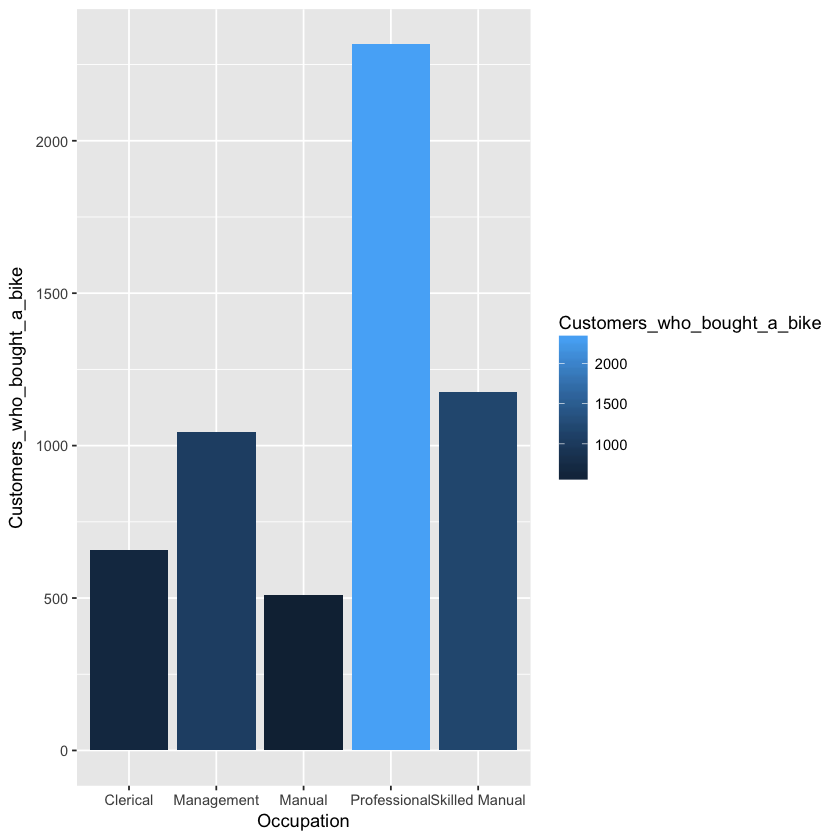

In [30]:
professional_awc_avs_bb <- subset(awc_avs_bb, Occupation == 'Professional')
clerical_awc_avs_bb <- subset(awc_avs_bb, Occupation == 'Clerical')
manual_awc_avs_bb <- subset(awc_avs_bb, Occupation == 'Manual')
management_awc_avs_bb <- subset(awc_avs_bb, Occupation == 'Management')
skilledm_awc_avs_bb <- subset(awc_avs_bb, Occupation == 'Skilled Manual')

Occupation <- c('Clerical', 'Manual', 'Management', 'Skilled Manual', 'Professional')
Customers_who_bought_a_bike <- c(clerical = as.numeric(sum(clerical_awc_avs_bb$BikeBuyer)), 
                             manual = as.numeric(sum(manual_awc_avs_bb$BikeBuyer)), 
                             management = as.numeric(sum(management_awc_avs_bb$BikeBuyer)),
                             skilledm = as.numeric(sum(skilledm_awc_avs_bb$BikeBuyer)),
                             professional =  as.numeric(sum(professional_awc_avs_bb$BikeBuyer)))

ggplot(data.frame(Occupation, Customers_who_bought_a_bike),
       aes(x = Occupation, y = Customers_who_bought_a_bike,
           fill = Customers_who_bought_a_bike))+geom_bar(stat = "identity")

c) The most common occupation type for customers who bought a bike is skilled manual - false, professional is the most common occupation type.

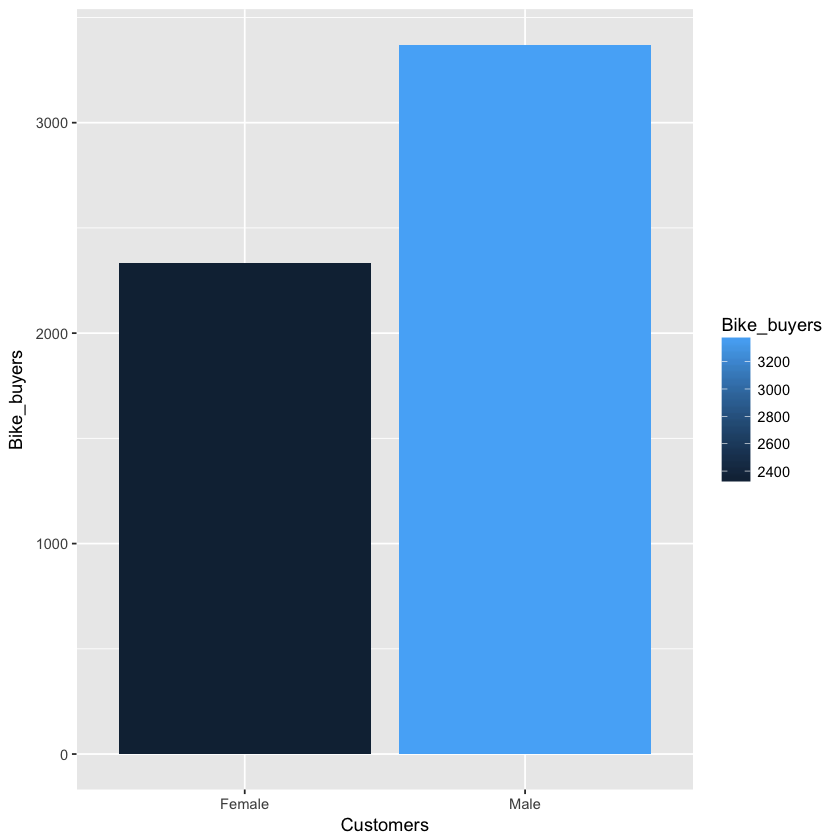

In [21]:
male_bikebuyers <- subset(awc_avs_bb, Gender == 'M' )
female_bikebuyers <- subset(awc_avs_bb, Gender == 'F' )

Customers <- c('Male', 'Female')
Bike_buyers <- c(male = as.numeric(sum(male_bikebuyers$BikeBuyer)), 
                female = as.numeric(sum(female_bikebuyers$BikeBuyer)))

ggplot(data.frame(Customers, Bike_buyers),
       aes(x = Customers, y = Bike_buyers,
           fill = Bike_buyers))+geom_bar(stat = "identity")

d) Male customers are more likely to buy bikes than female customers - correct.

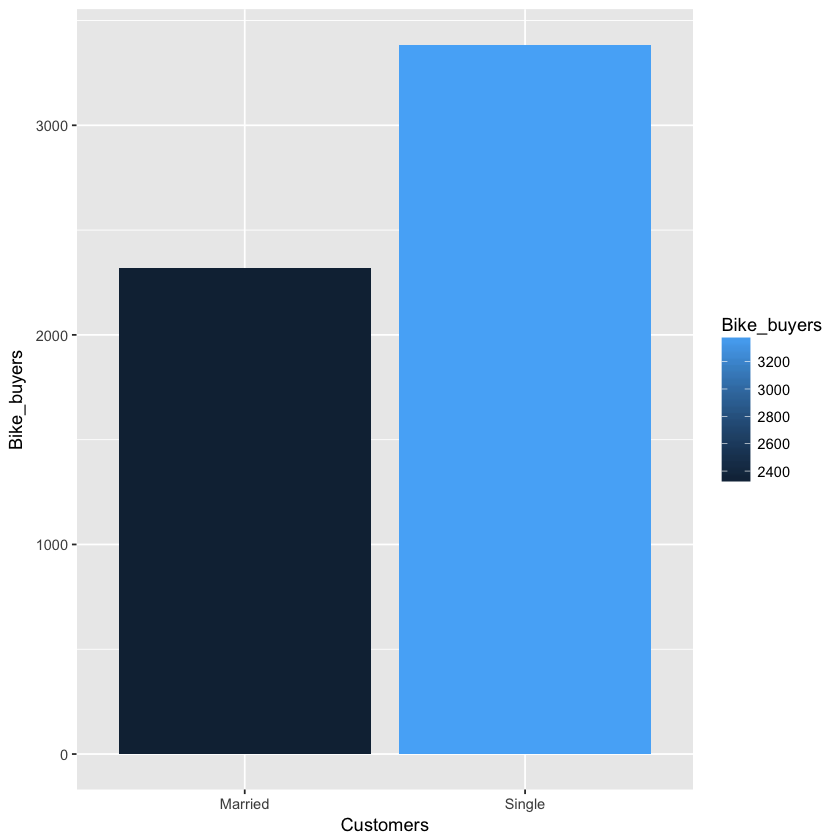

In [22]:
married_bikebuyers <- subset(awc_avs_bb, MaritalStatus == 'M' )
single_bikebuyers <- subset(awc_avs_bb, MaritalStatus == 'S' )

Customers <- c('Married', 'Single')
Bike_buyers <- c(married = as.numeric(sum(married_bikebuyers$BikeBuyer)), 
                single = as.numeric(sum(single_bikebuyers$BikeBuyer)))

ggplot(data.frame(Customers, Bike_buyers),
       aes(x = Customers, y = Bike_buyers,
           fill = Bike_buyers))+geom_bar(stat = "identity")

e) A maried customer is more likely to buy a bike - that's not true

## Classification

In this section we create a classifcation model. The purpose of the model is to predict whether customer will purchase a bike or not. Firstly, we need to import the test data for the prediction.

In [23]:
aw_test <- read.csv('/Users/szymonduranowski/Downloads/AW_test.csv')
dim(aw_test)
head(aw_test)

[1] 500  23

CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,⋯,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
18988,,Courtney,A,Baker,,8727 Buena Vista Ave.,,Fremont,California,⋯,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
29135,,Adam,C,Allen,,3491 Cook Street,,Haney,British Columbia,⋯,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
12156,,Bonnie,,Raji,,359 Pleasant Hill Rd,,Burbank,California,⋯,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
13749,,Julio,C,Alonso,,8945 Euclid Ave.,,Burlingame,California,⋯,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
27780,,Christy,A,Andersen,,"42, boulevard Tremblay",,Dunkerque,Nord,⋯,3/19/1965,High School,Manual,F,M,1,1,2,2,21876
16375,,Gabriella,,Hernandez,,5689 Almondtree Circle,,Spring Valley,California,⋯,8/23/1957,Partial College,Clerical,F,M,1,1,0,1,44467


The train data will be AdvWorksCuts dataset merged previously with AveMonthSpend and BikeBuyer datasets. Also, we need to subset the most important features by using dplyr package. 

In [24]:
awc_avs_bb <- awc_avs_bb %>%
   select(BikeBuyer, AveMonthSpend, Gender, YearlyIncome, Occupation,
          MaritalStatus, NumberCarsOwned, NumberChildrenAtHome, TotalChildren)

In [25]:
set.seed(222)
partition <- createDataPartition(awc_avs_bb$BikeBuyer, p = .08, 
                              list = FALSE, 
                              times = 1)
train <- awc_avs_bb[partition,]
dim(train)
test <- aw_test
dim(test)

[1] 1377    9

[1] 500  23

The train data includes couple times more variables than test data, therefore sample of the data needs to be minimized to 0.08.

In [26]:
set.seed(333)
rf_model <- randomForest(BikeBuyer ~ Gender + YearlyIncome + 
                            Occupation + MaritalStatus + NumberCarsOwned + 
                            NumberChildrenAtHome + TotalChildren,
                          data = train,
                          importance = T,
                          ntree = 1000,
                          mtry = 3)

rf_predict <- predict(rf_model, newdata = test, type = 'response')
probs <- data.frame(rf_predict)
test <- cbind(test, probs)

score_model <- function(df, threshold){
    df$BikeBuyer = ifelse(df$rf_predict < threshold, '0', '1')
    df
}
 
test <- score_model(test, 0.5)
test[1:20, c('CustomerID','rf_predict','BikeBuyer')]

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”

CustomerID,rf_predict,BikeBuyer
18988,0.043637655,0
29135,0.762886887,1
12156,0.024338752,0
13749,0.250361225,0
27780,0.075158955,0
16375,0.008747375,0
16109,0.730255977,1
15606,0.811085424,1
20888,0.761104762,1
20716,0.247261831,0


In accordance to the prediction of the customer bahaviour, it is possible to assess if a certain customer will purchase a bike or not. There are the results of the classification model for the first 20 variables above.

## Regression

With the linear regression model we will predict customer's monthly monthly spend. This model will help to predict average monthly spend for the new customers for whom no information about average monthly spend or previous bike purchases is available.

In [27]:
lin_mod = lm(AveMonthSpend ~ YearlyIncome + NumberChildrenAtHome + NumberCarsOwned
             + TotalChildren + Gender + MaritalStatus + Occupation, data = train)

In [28]:
test$AveMonthSpend <- predict(lin_mod, test)

In [29]:
test[1:20,c('CustomerID', 'AveMonthSpend')]

CustomerID,AveMonthSpend
18988,40.50627
29135,105.36209
12156,50.53421
13749,88.97320
27780,59.87759
16375,43.51219
16109,94.54251
15606,127.14869
20888,102.37330
20716,55.42298


Now we are able see average monthly spend for each customer.